<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/Brain_Tumour_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import basic pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
#Directory and Category assignment
DATADIR = '/content/drive/MyDrive/Dataset/Brain Tumour Dataset'
CATEGORIES = ['Healthy','Brain Tumor']

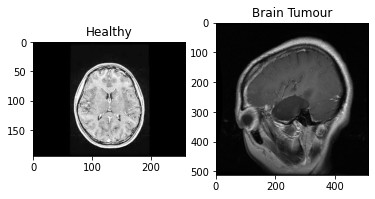

In [3]:
#Showing some sample data
x1 = cv2.imread('/content/drive/MyDrive/Dataset/Brain Tumour Dataset/Healthy/Not Cancer  (1001).jpg')
x2 = cv2.imread('/content/drive/MyDrive/Dataset/Brain Tumour Dataset/Brain Tumor/Cancer (100).jpg')

plt.subplot(1,2,1)
plt.imshow(x1)
plt.title('Healthy')

plt.subplot(1,2,2)
plt.imshow(x2)
plt.title('Brain Tumour')

plt.show()

In [4]:
#Shape of the sample data
print('Shape of Healthy image:',x1.shape)
print('Shape of Brain Tumour image:',x2.shape)

Shape of Healthy image: (194, 259, 3)
Shape of Brain Tumour image: (512, 512, 3)


In [5]:
#Preprocessing the data
processed_data = []

IMG_SIZE = 150

def process_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      processed_data.append([new_array, class_num])

process_data()

In [6]:
#Total data length
data_length = len(processed_data)
print('Total data size =',data_length)

Total data size = 4596


In [7]:
#Split, label and store data in X and y array
X = []
y = []

for categories, label in processed_data:
  X.append(categories)
  y.append(label)

In [8]:
#Converting X and y into numpy array and reshaping X
X = np.array(X).reshape(data_length, -1)
y = np.array(y)

print('X:',X)
print('y:',y)
print('X shape:', X.shape)
print('y shape: ', y.shape)

X: [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   1   1 ...  50  50  50]
 ...
 [  1   1   1 ...   1   1   1]
 [ 10  10  10 ... 136 136 136]
 [  1   1   1 ...   1   1   1]]
y: [0 0 0 ... 1 1 1]
X shape: (4596, 67500)
y shape:  (4596,)


In [9]:
#Rescaling X values in 0 to 1 scale
X = X/255.0
print('X:',X)

X: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.19607843 0.19607843 0.19607843]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.03921569 0.03921569 0.03921569 ... 0.53333333 0.53333333 0.53333333]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]


In [10]:
#Splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 )

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (3676, 67500)
Test data shape: (920, 67500)


In [11]:
#Import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
#Decision Tree Classification
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
y_dtc = dtc.fit(X_train, y_train).predict(X_test)

In [13]:
#Decision Tree Classification result evaluation
print("Accuracy:", accuracy_score(y_test, y_dtc))
print(classification_report(y_test, y_dtc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_dtc))

Accuracy: 0.8967391304347826
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       441
           1       0.93      0.87      0.90       479

    accuracy                           0.90       920
   macro avg       0.90      0.90      0.90       920
weighted avg       0.90      0.90      0.90       920

Confusion Metrics:
[[408  33]
 [ 62 417]]


In [14]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [15]:
#Gaussian Naive Bayes evaluation
print("Accuracy:", accuracy_score(y_test, y_gnb))
print(classification_report(y_test, y_gnb))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_gnb))

Accuracy: 0.6076086956521739
              precision    recall  f1-score   support

           0       0.56      0.82      0.67       441
           1       0.72      0.41      0.52       479

    accuracy                           0.61       920
   macro avg       0.64      0.62      0.59       920
weighted avg       0.64      0.61      0.59       920

Confusion Metrics:
[[363  78]
 [283 196]]


In [38]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [39]:
#RandomForest result evaluation
print("Accuracy:", accuracy_score(y_test, y_rf))
print(classification_report(y_test, y_rf))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_rf))

Accuracy: 0.9728260869565217
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       441
           1       0.97      0.97      0.97       479

    accuracy                           0.97       920
   macro avg       0.97      0.97      0.97       920
weighted avg       0.97      0.97      0.97       920

Confusion Metrics:
[[429  12]
 [ 13 466]]


In [18]:
#RandomForest with n_estimator=50
from sklearn.ensemble import RandomForestClassifier

rf_ne50 = RandomForestClassifier(n_estimators=50)
y_rf_ne50 = rf_ne50.fit(X_train, y_train).predict(X_test)

In [19]:
#RandomForest with n_estimators=50 evaluation 
print("Accuracy:", accuracy_score(y_test, y_rf_ne50))
print(classification_report(y_test, y_rf_ne50))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_rf_ne50))

Accuracy: 0.9641304347826087
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       441
           1       0.96      0.97      0.97       479

    accuracy                           0.96       920
   macro avg       0.96      0.96      0.96       920
weighted avg       0.96      0.96      0.96       920

Confusion Metrics:
[[424  17]
 [ 16 463]]


In [20]:
#RandomForest with n_estimator=25
from sklearn.ensemble import RandomForestClassifier

rf_ne25 = RandomForestClassifier(n_estimators=25)
y_rf_ne25 = rf_ne25.fit(X_train, y_train).predict(X_test)

In [21]:
#RandomForest with n_estimators=25 result evaluation
print("Accuracy:", accuracy_score(y_test, y_rf_ne25))
print(classification_report(y_test, y_rf_ne25))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_rf_ne25))

Accuracy: 0.966304347826087
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       441
           1       0.96      0.97      0.97       479

    accuracy                           0.97       920
   macro avg       0.97      0.97      0.97       920
weighted avg       0.97      0.97      0.97       920

Confusion Metrics:
[[423  18]
 [ 13 466]]


In [22]:
#K-Nearest Neighbor with n_neighbors=3
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
y_knn = knn.fit(X_train, y_train).predict(X_test)

In [23]:
#K-Nearest Neighbor with n_neighbors=3 result evaluation
print("Accuracy:", accuracy_score(y_test, y_knn))
print(classification_report(y_test, y_knn))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn))

Accuracy: 0.9260869565217391
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       441
           1       0.96      0.89      0.93       479

    accuracy                           0.93       920
   macro avg       0.93      0.93      0.93       920
weighted avg       0.93      0.93      0.93       920

Confusion Metrics:
[[424  17]
 [ 51 428]]


In [24]:
#K-Nearest Neighbor with n_neighbors=5
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
y_knn5 = knn5.fit(X_train, y_train).predict(X_test)

In [25]:
#K-Nearest Neighbor with n_neighbors=5 result evaluation
print("Accuracy:", accuracy_score(y_test, y_knn5))
print(classification_report(y_test, y_knn5))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn5))

Accuracy: 0.8978260869565218
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       441
           1       0.95      0.85      0.90       479

    accuracy                           0.90       920
   macro avg       0.90      0.90      0.90       920
weighted avg       0.90      0.90      0.90       920

Confusion Metrics:
[[418  23]
 [ 71 408]]


In [26]:
#K-Nearest Neighbor with n_neighbors=2
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=2)
y_knn2 = knn2.fit(X_train, y_train).predict(X_test)

In [27]:
#K-Nearest Neighbor with n_neighbors=2 result evaluation
print("Accuracy:", accuracy_score(y_test, y_knn2))
print(classification_report(y_test, y_knn2))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn2))

Accuracy: 0.9282608695652174
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       441
           1       0.99      0.87      0.93       479

    accuracy                           0.93       920
   macro avg       0.93      0.93      0.93       920
weighted avg       0.94      0.93      0.93       920

Confusion Metrics:
[[438   3]
 [ 63 416]]


In [28]:
#Support Vector Machine Classifier
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf')
y_svm = svm_classifier.fit(X_train, y_train).predict(X_test)

In [29]:
#SVM rbf  Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_svm))
print(classification_report(y_test, y_svm))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm))

Accuracy: 0.9510869565217391
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       441
           1       0.93      0.98      0.95       479

    accuracy                           0.95       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920

Confusion Metrics:
[[407  34]
 [ 11 468]]


In [30]:
#SVM_kernel=linear
from sklearn import svm

svm_linear = svm.SVC(kernel='linear')
y_svm_linear = svm_linear.fit(X_train, y_train).predict(X_test)

In [31]:
#SVM_linear result evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_linear))
print(classification_report(y_test, y_svm_linear))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_linear))

Accuracy: 0.9586956521739131
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       441
           1       0.96      0.96      0.96       479

    accuracy                           0.96       920
   macro avg       0.96      0.96      0.96       920
weighted avg       0.96      0.96      0.96       920

Confusion Metrics:
[[424  17]
 [ 21 458]]


In [32]:
#SVM_kernel=poly
from sklearn import svm

svm_poly = svm.SVC(kernel='poly')
y_svm_poly = svm_poly.fit(X_train, y_train).predict(X_test)

In [33]:
#SVM_poly result evaluation
print("Accuracy:", accuracy_score(y_test, y_svm_poly))
print(classification_report(y_test, y_svm_poly))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm_poly))

Accuracy: 0.9239130434782609
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       441
           1       0.90      0.96      0.93       479

    accuracy                           0.92       920
   macro avg       0.93      0.92      0.92       920
weighted avg       0.93      0.92      0.92       920

Confusion Metrics:
[[392  49]
 [ 21 458]]


In [40]:
#Comparison of models' performance
models = ['Decision Tree Classifier', 'Gaussian Naive Bayes','Random Forest Classifier',
            'Random Forest n_estimator=50','Random Forest n_estimator=25','KNN n_neighbors=3',
                'KNN n_neighbors=5','KNN n_neighbors=5','SVM RBF','SVM Linear','SVM Poly']

d = accuracy_score(y_test, y_dtc)
g = accuracy_score(y_test, y_gnb)
r = accuracy_score(y_test, y_rf)
r_50 = accuracy_score(y_test, y_rf_ne50)
r_25 = accuracy_score(y_test, y_rf_ne25)
knn_3 = accuracy_score(y_test, y_knn)
knn_5 = accuracy_score(y_test, y_knn5)
knn_2 = accuracy_score(y_test, y_knn2)
s_rbf = accuracy_score(y_test, y_svm)
s_linear = accuracy_score(y_test, y_svm_linear)
s_poly = accuracy_score(y_test, y_svm_poly)


tests_score = [d,g,r,r_50,r_25,knn_3,knn_5,knn_2,s_rbf,s_linear,s_poly]
compare_models = pd.DataFrame({ "Algorithm": models, "Accuracy": tests_score })
compare_models.sort_values(by = "Accuracy", ascending = False)

,Algorithm,Accuracy
2,Random Forest Classifier,0.972826
4,Random Forest n_estimator=25,0.966304
3,Random Forest n_estimator=50,0.964130
9,SVM Linear,0.958696
8,SVM RBF,0.951087
7,KNN n_neighbors=5,0.928261
5,KNN n_neighbors=3,0.926087
10,SVM Poly,0.923913
6,KNN n_neighbors=5,0.897826
0,Decision Tree Classifier,0.896739


In [41]:
#Comparison of F1 scores
from sklearn.metrics import f1_score

d_f1 = f1_score(y_test, y_dtc)
g_f1 = f1_score(y_test, y_gnb)
r_f1 = f1_score(y_test, y_rf)
r_50_f1 = f1_score(y_test, y_rf_ne50)
r_25_f1 = f1_score(y_test, y_rf_ne25)
knn_3_f1 = f1_score(y_test, y_knn)
knn_5_f1 = f1_score(y_test, y_knn5)
knn_2_f1 = f1_score(y_test, y_knn2)
s_rbf_f1 = f1_score(y_test, y_svm)
s_linear_f1 = f1_score(y_test, y_svm_linear)
s_poly_f1 = f1_score(y_test, y_svm_poly)


tests_score_f1 = [d_f1,g_f1,r_f1,r_50_f1,r_25_f1,knn_3_f1,knn_5_f1,knn_2_f1,s_rbf_f1,s_linear_f1,s_poly_f1]
compare_models = pd.DataFrame({ "Algorithm": models, "F1 scores": tests_score_f1 })
compare_models.sort_values(by = "F1 scores", ascending = False)

,Algorithm,F1 scores
2,Random Forest Classifier,0.973877
4,Random Forest n_estimator=25,0.967809
3,Random Forest n_estimator=50,0.965589
9,SVM Linear,0.960168
8,SVM RBF,0.954128
10,SVM Poly,0.929006
7,KNN n_neighbors=5,0.926503
5,KNN n_neighbors=3,0.926407
0,Decision Tree Classifier,0.897740
6,KNN n_neighbors=5,0.896703


In [42]:
#Saving the best model
import pickle
pickle.dump(rf, open('brain_tumour_detection_model.p','wb'))

In [43]:
#Loading the model
import pickle
model = pickle.load(open('/content/brain_tumour_detection_model.p','rb'))

In [44]:
#Function to process test data
def process_test_data(a):
  a = cv2.resize(a, (IMG_SIZE, IMG_SIZE))
  a = np.array(a).reshape(1,-1)
  a = a/255.0
  return a

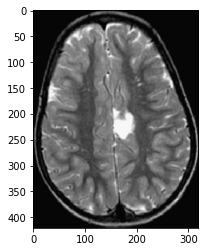

In [45]:
#Loading test data
test_img = cv2.imread('/content/test_image.jpg')
plt.imshow(test_img)
plt.show()

In [46]:
print('Shape of test image:',test_img.shape)

Shape of test image: (421, 320, 3)


In [47]:
#Processing the test image
test_img_p = process_test_data(test_img)
print('Shape of test image afted process:',test_img_p.shape)

Shape of test image afted process: (1, 67500)


In [48]:
#Predict the category of test data
test_pred = model.predict(test_img_p)
print('Predicted Value:', test_pred)
print('Prediction:', CATEGORIES[test_pred[0]])

Predicted Value: [1]
Prediction: Brain Tumor
